<a href="https://colab.research.google.com/github/hyunjung930/sesac-web/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_KNN%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN 분류에 사용할 데이터 - 붓꽃 데이터

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data)

In [11]:
data = iris_data['data']
data.shape # 특성의 갯수 ->4
# 150개 X (setal-length,setal-width,pepal-length,pepal-width)

(150, 4)

In [12]:
target = iris_data['target']
target.shape # 150개 ([0:50]=>, [50:100]=>1, [100:]=>2 )

(150,)

In [13]:
tname = iris_data['target_names']
tname #타겟 네임이 0이면 setosa, 1이면 versinica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
for i,t in enumerate(target):
  print(f"{i}:{tname[t]}")

In [19]:
def distance(x1,x2):
  return sum((x1-x2)**2)**(1/2)

In [20]:
import numpy as np
na1 = np.array([1,2])
na2 = np.array([5,5])
print(distance(na1,na2))

5.0


In [36]:
def find_k_nearest_neighbor_c(xs,ys,tx,k=5):
  sarr = []
  for i,x in enumerate(xs):
    dis = distance(x,tx)
    sarr.append((dis,i)) #거리순으로 정렬한 이후에도 몇 번째 요소인지 기억하기 위해(dis,i)를 보관
  sarr.sort(key = lambda x:x[0])
  nd = {} #어떠한 클래스에 속하는지 분포를 파악해서 보관하기 위한 용도
  for x in sarr[:k]: #k개의 가까운 이웃을 반복
    neighbor = ys[x[1]] #x[0]은 거리 x[1]은 인덱스이므로 원하는 값은 ys[x[1]]
    if neighbor in nd:
      nd[neighbor] += 1
    else:
      nd[neighbor] = 0 
  return max(nd,key=nd.get) #가장 많이 나온 클래스를 반환  

In [37]:
def find_k_nearset_neighbors_c(xs,ys,t_xs,k=5):
  return np.array([find_k_nearest_neighbor_c(xs,ys,tx,k) for tx in t_xs])

In [23]:
data.shape, target.shape

((150, 4), (150,))

In [25]:
from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys = train_test_split(data,target) #학습데이터와 테스트 데이터로 분리
train_xs.shape, test_xs.shape,train_ys.shape, test_ys.shape

((112, 4), (38, 4), (112,), (38,))

In [38]:
pred_val = find_k_nearset_neighbors_c(train_xs,train_ys,test_xs) # 학습 후 예측하시오.

In [39]:
print(f"예측결과: {pred_val}")
print(f"실제결과: {test_ys}")

예측결과: [1 1 2 1 0 2 0 1 1 0 2 2 2 1 1 0 0 1 0 0 2 2 0 1 2 1 0 1 1 0 2 0 2 1 0 2 0
 2]
실제결과: [1 1 2 1 0 2 0 1 1 0 1 2 2 1 1 0 0 1 0 0 2 2 0 1 2 1 0 1 1 0 2 0 2 1 0 2 0
 2]


In [40]:
import matplotlib.pyplot as plt

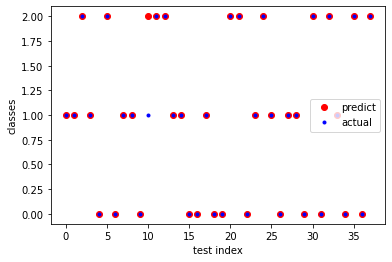

In [41]:
plt.plot(pred_val,'ro',label='predict')
plt.plot(test_ys,'b.',label='actual')
plt.xlabel("test index")
plt.ylabel("classes")
plt.legend()
plt.show()

In [42]:
def evaluate(actual_ys,predict_ys):
  correct_cnt = 0
  for i,y in enumerate(actual_ys):
    if predict_ys[i] == y:
      correct_cnt +=1
    return correct_cnt/len(actual_ys)

In [43]:
print(evaluate(test_ys,pred_val))

0.02631578947368421


ML 개체 사용(사이킷 런의 KNN 분류 모델)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier() #모델 개체 생성
knc_model.fit(train_xs,train_ys) #학습
pred_val2 = knc_model.predict(test_xs) #예측하시오

In [48]:
print(f"예측결과 :{pred_val}")
print(f"예측결과2 :{pred_val2}")
print(f"실제결과 :{test_ys}")

예측결과 :[1 1 2 1 0 2 0 1 1 0 2 2 2 1 1 0 0 1 0 0 2 2 0 1 2 1 0 1 1 0 2 0 2 1 0 2 0
 2]
예측결과2 :[1 1 2 1 0 2 0 1 1 0 2 2 2 1 1 0 0 1 0 0 2 2 0 1 2 1 0 1 1 0 2 0 2 1 0 2 0
 2]
실제결과 :[1 1 2 1 0 2 0 1 1 0 1 2 2 1 1 0 0 1 0 0 2 2 0 1 2 1 0 1 1 0 2 0 2 1 0 2 0
 2]


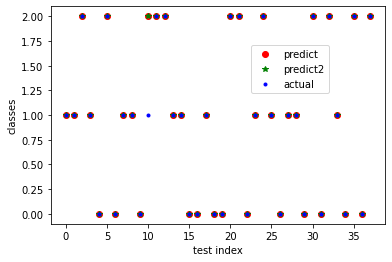

In [52]:
plt.plot(pred_val,'ro',label='predict')
plt.plot(pred_val2,'g*',label='predict2')
plt.plot(test_ys,'b.',label='actual')
plt.xlabel("test index")
plt.ylabel("classes")
plt.legend(loc = (0.6,0.6))
plt.show()

In [53]:
print(evaluate(test_ys,pred_val2))

0.02631578947368421
